In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\minji\AppData\Local\Temp/ipykernel_22144/2884596146.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


### Gradient descent in 1D

In [2]:
def fx(x):
    return 3*x**2 - 3*x + 4

def deriv(x):
    return 6*x - 3

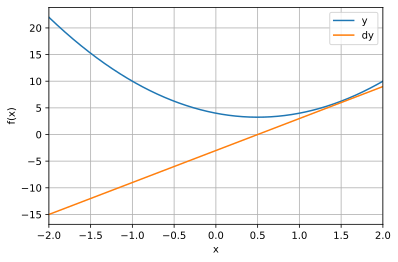

In [5]:
# define a range for x
x = np.linspace(-2, 2, 2001)

# plotting
plt.plot(x, fx(x), x, deriv(x))
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy'])
plt.show()

In [7]:
# random starting point
localmin = np.random.choice(x, 1)
print(f"INITIAL RANDOM GUESS: {localmin}")

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad
    
localmin

INITIAL RANDOM GUESS: [-0.346]


array([0.49826158])

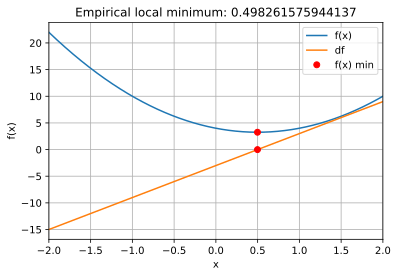

In [8]:
# plot the results
plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')

plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title(f'Empirical local minimum: {localmin[0]}')
plt.show()

### Store the model parameters and outputs on each iteration

In [29]:
# random starting point
localmin = np.random.choice(x, 1)
print(f"INITIAL RANDOM GUESS: {localmin}")

# learning parameters
learning_rate = 0.01
training_epochs = 100

# run through training and store all the results
modelparams = np.zeros((training_epochs, 2)) # (100, 2)
for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad
    modelparams[i, :] = localmin, grad

INITIAL RANDOM GUESS: [0.822]


C:\Users\minji\AppData\Local\Temp/ipykernel_22144/663189518.py:14: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  modelparams[i, :] = localmin, grad


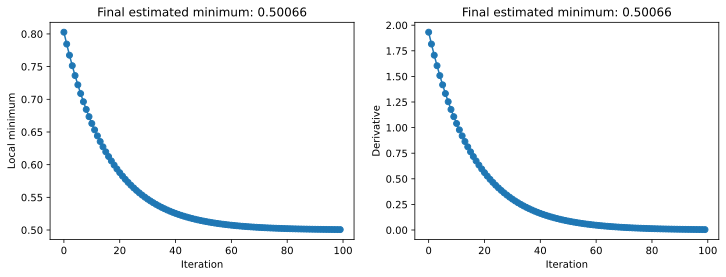

In [30]:
# plot the gradient over iterations
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Column별로 그래프 따로 그리기
for i in range(2):
    ax[i].plot(modelparams[:,i], 'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f"Final estimated minimum: {localmin[0]:.5}")
    
ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

In [40]:
def gd_plot(learning_rate, training_epochs):
    
    # fx = lambda x: 3*x**2 - 3*x + 4
    derivative = lambda x: 6*x - 3
    
    # Initialize
    # x_value = np.random.choice(np.linspace(-2, 2, 2001))
    x_value = 0.75
    
    # Gradient Descent
    training_results = np.zeros((training_epochs, 2))
    for i in range(training_epochs):
        gradient = derivative(x_value)
        x_value = x_value - learning_rate*gradient
        training_results[i,:] = x_value, gradient
    
    return training_results, x_value

### lr = 0.0001, epochs = 100
- 매번 업데이트되는 양이 너무 적어 global minimum까지 가기 전에 끝나버림

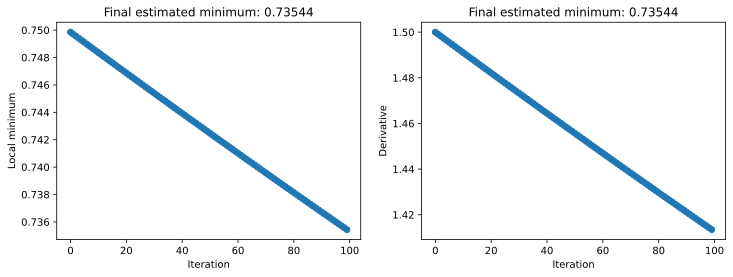

In [42]:
training_results, localmin = gd_plot(0.0001, 100)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
    ax[i].plot(training_results[:,i], 'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f"Final estimated minimum: {localmin:.5}")
    
ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

### lr = 0.0001, epochs = 10000
- lr이 작을 때에는 epochs 수가 커야 한다

In [43]:
training_results, localmin = gd_plot(0.0001, 10000)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
    ax[i].plot(training_results[:,i], 'o-')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f"Final estimated minimum: {localmin:.5}")
    
ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

### lr = 10, epochs = 10

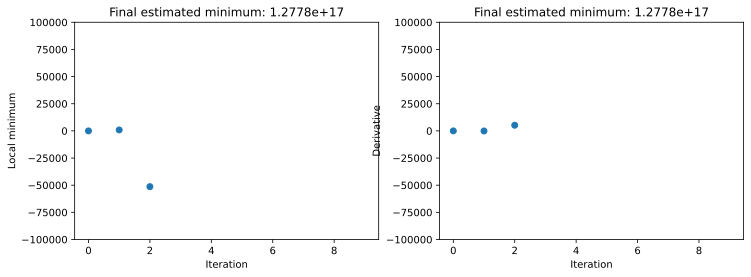

In [61]:
training_results, localmin = gd_plot(10, 10)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
    ax[i].plot(training_results[:,i], 'o')
    ax[i].set_xlabel('Iteration')
    ax[i].set_title(f"Final estimated minimum: {localmin:.5}")
    ax[i].set_ylim(-100000, 100000)

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

In [56]:
training_results

array([[-1.42500000e+01,  1.50000000e+00],
       [ 8.70750000e+02, -8.85000000e+01],
       [-5.13442500e+04,  5.22150000e+03],
       [ 3.02934075e+06, -3.08068500e+05],
       [-1.78731074e+08,  1.81760415e+07],
       [ 1.05451334e+10, -1.07238645e+09],
       [-6.22162871e+11,  6.32708005e+10],
       [ 3.67076094e+13, -3.73297723e+12],
       [-2.16574895e+15,  2.20245656e+14],
       [ 1.27779188e+17, -1.29944937e+16]])